# Assignment 3 - Evaluation

In this assignment you will train several models and evaluate how effectively they predict instances of fraud using data based on [this dataset from Kaggle](https://www.kaggle.com/dalpozz/creditcardfraud).
 
Each row in `fraud_data.csv` corresponds to a credit card transaction. Features include confidential variables `V1` through `V28` as well as `Amount` which is the amount of the transaction. 
 
The target is stored in the `class` column, where a value of 1 corresponds to an instance of fraud and 0 corresponds to an instance of not fraud.

In [1]:
import numpy as np
import pandas as pd
import warnings
warnings.simplefilter("ignore")

### Question 1
Import the data from `fraud_data.csv`. What percentage of the observations in the dataset are instances of fraud?

*This function should return a float between 0 and 1.* 

In [2]:
df = pd.read_csv('fraud_data.csv')
print(df.columns)
print(df.info())
df.head()

Index(['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11',
       'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21',
       'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount', 'Class'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21693 entries, 0 to 21692
Data columns (total 30 columns):
V1        21693 non-null float64
V2        21693 non-null float64
V3        21693 non-null float64
V4        21693 non-null float64
V5        21693 non-null float64
V6        21693 non-null float64
V7        21693 non-null float64
V8        21693 non-null float64
V9        21693 non-null float64
V10       21693 non-null float64
V11       21693 non-null float64
V12       21693 non-null float64
V13       21693 non-null float64
V14       21693 non-null float64
V15       21693 non-null float64
V16       21693 non-null float64
V17       21693 non-null float64
V18       21693 non-null float64
V19       21693 non-null float64
V20       2169

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,1.176563,0.323798,0.536927,1.047002,-0.368652,-0.728586,0.084678,-0.069246,-0.266389,0.155315,...,-0.109627,-0.341365,0.057845,0.499180,0.415211,-0.581949,0.015472,0.018065,4.67,0
1,0.681109,-3.934776,-3.801827,-1.147468,-0.735540,-0.501097,1.038865,-0.626979,-2.274423,1.527782,...,0.652202,0.272684,-0.982151,0.165900,0.360251,0.195321,-0.256273,0.056501,912.00,0
2,1.140729,0.453484,0.247010,2.383132,0.343287,0.432804,0.093380,0.173310,-0.808999,0.775436,...,-0.003802,0.058556,-0.121177,-0.304215,0.645893,0.122600,-0.012115,-0.005945,1.00,0
3,-1.107073,-3.298902,-0.184092,-1.795744,2.137564,-1.684992,-2.015606,-0.007181,-0.165760,0.869659,...,0.130648,0.329445,0.927656,-0.049560,-1.892866,-0.575431,0.266573,0.414184,62.10,0
4,-0.314818,0.866839,-0.124577,-0.627638,2.651762,3.428128,0.194637,0.670674,-0.442658,0.133499,...,-0.312774,-0.799494,-0.064488,0.953062,-0.429550,0.158225,0.076943,-0.015051,2.67,0


In [3]:
def answer_one():
    df = pd.read_csv('fraud_data.csv')
    counts = df['Class'].value_counts()
    
    return counts[1]/counts.sum()

answer_one()

0.016410823768035772

In [4]:
# Use X_train, X_test, y_train, y_test for all of the following questions
from sklearn.model_selection import train_test_split

df = pd.read_csv('fraud_data.csv')

X = df.iloc[:,:-1]
y = df.iloc[:,-1]

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

### Question 2

Using `X_train`, `X_test`, `y_train`, and `y_test` (as defined above), train a dummy classifier that classifies everything as the majority class of the training data. What is the accuracy of this classifier? What is the recall?

*This function should a return a tuple with two floats, i.e. `(accuracy score, recall score)`.*

In [5]:
def answer_two():
    from sklearn.dummy import DummyClassifier
    from sklearn.metrics import recall_score, accuracy_score
    
    dummy = DummyClassifier()
    dummy.fit(X_train, y_train)
    y_hat = dummy.predict(X_test)
        
    return (accuracy_score(y_test, y_hat), recall_score(y_test, y_hat))

answer_two()

(0.9717920353982301, 0.0375)

### Question 3

Using X_train, X_test, y_train, y_test (as defined above), train a SVC classifer using the default parameters. What is the accuracy, recall, and precision of this classifier?

*This function should a return a tuple with three floats, i.e. `(accuracy score, recall score, precision score)`.*

In [6]:
def answer_three():
    from sklearn.metrics import recall_score, precision_score, accuracy_score
    from sklearn.svm import SVC
    
    svm = SVC()
    svm.fit(X_train, y_train)
    y_hat = svm.predict(X_test)
        
    return (accuracy_score(y_test, y_hat), recall_score(y_test, y_hat), precision_score(y_test, y_hat))

answer_three()

(0.9907817109144543, 0.375, 1.0)

### Question 4

Using the SVC classifier with parameters `{'C': 1e9, 'gamma': 1e-07}`, what is the confusion matrix when using a threshold of -220 on the decision function. Use X_test and y_test.

*This function should return a confusion matrix, a 2x2 numpy array with 4 integers.*

In [7]:
def answer_four():
    from sklearn.metrics import confusion_matrix
    from sklearn.svm import SVC

    svm = SVC(gamma=1e-07, C=1e9)
    svm.fit(X_train, y_train)
    y_hat = svm.decision_function(X_test) > -220
    confusion = confusion_matrix(y_test, y_hat)
    
    return confusion
answer_four()

array([[5320,   24],
       [  14,   66]])

### Question 5

Train a logisitic regression classifier with default parameters using X_train and y_train.

For the logisitic regression classifier, create a precision recall curve and a roc curve using y_test and the probability estimates for X_test (probability it is fraud).

Looking at the precision recall curve, what is the recall when the precision is `0.75`?

Looking at the roc curve, what is the true positive rate when the false positive rate is `0.16`?

*This function should return a tuple with two floats, i.e. `(recall, true positive rate)`.*

In [8]:
def answer_five():
    from sklearn.metrics import precision_recall_curve, roc_curve
    from sklearn.linear_model import LogisticRegression
    
    lr = LogisticRegression()
    lr.fit(X_train, y_train)
    y_score = lr.decision_function(X_test)
    fpr_lr, tpr_lr, thh_roc = roc_curve(y_test, y_score)
    precision, recall, thh_pr = precision_recall_curve(y_test, y_score)

    idx_75 = precision.searchsorted(0.75)
    idx_16 = fpr_lr.searchsorted(0.16)
    
    return (recall[idx_75], tpr_lr[idx_16])

answer_five()

(0.825, 0.95)

### Question 6

Perform a grid search over the parameters listed below for a Logisitic Regression classifier, using recall for scoring and the default 3-fold cross validation.

`'penalty': ['l1', 'l2']`

`'C':[0.01, 0.1, 1, 10, 100]`

From `.cv_results_`, create an array of the mean test scores of each parameter combination. i.e.

|      	| `l1` 	| `l2` 	|
|:----:	|----	|----	|
| **`0.01`** 	|    ?	|   ? 	|
| **`0.1`**  	|    ?	|   ? 	|
| **`1`**    	|    ?	|   ? 	|
| **`10`**   	|    ?	|   ? 	|
| **`100`**   	|    ?	|   ? 	|

<br>

*This function should return a 5 by 2 numpy array with 10 floats.* 

*Note: do not return a DataFrame, just the values denoted by '?' above in a numpy array. You might need to reshape your raw result to meet the format we are looking for.*

In [9]:
def answer_six():    
    from sklearn.model_selection import GridSearchCV
    from sklearn.linear_model import LogisticRegression

    lr = LogisticRegression()
    params = {
                'penalty': ['l1', 'l2'],
                'C':[0.01, 0.1, 1, 10, 100]
             }
    grid_lr = GridSearchCV(lr, param_grid = params, cv=3, scoring='recall')
    grid_lr.fit(X_train, y_train)
    y_scores = grid_lr.decision_function(X_test)
    results = grid_lr.cv_results_
    l1 = results['mean_test_score'][0::2]
    l2 = results['mean_test_score'][1::2]
    
    return np.concatenate(([l1], [l2]), axis=0).T
answer_six()

array([[0.66666667, 0.76086957],
       [0.80072464, 0.80434783],
       [0.8115942 , 0.8115942 ],
       [0.80797101, 0.8115942 ],
       [0.80797101, 0.8115942 ]])

In [10]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
params = {
            'penalty': ['l1', 'l2'],
            'C':[0.01, 0.1, 1, 10, 100]
         }
grid_lr = GridSearchCV(lr, param_grid = params, cv=3, scoring='recall')
grid_lr.fit(X_train, y_train)
y_scores = grid_lr.decision_function(X_test)

In [11]:
print(grid_lr.best_params_)
print(grid_lr.best_score_)
grid_lr.best_estimator_

{'C': 10, 'penalty': 'l2'}
0.8115942028985509


LogisticRegression(C=10, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

<IPython.core.display.Javascript object>


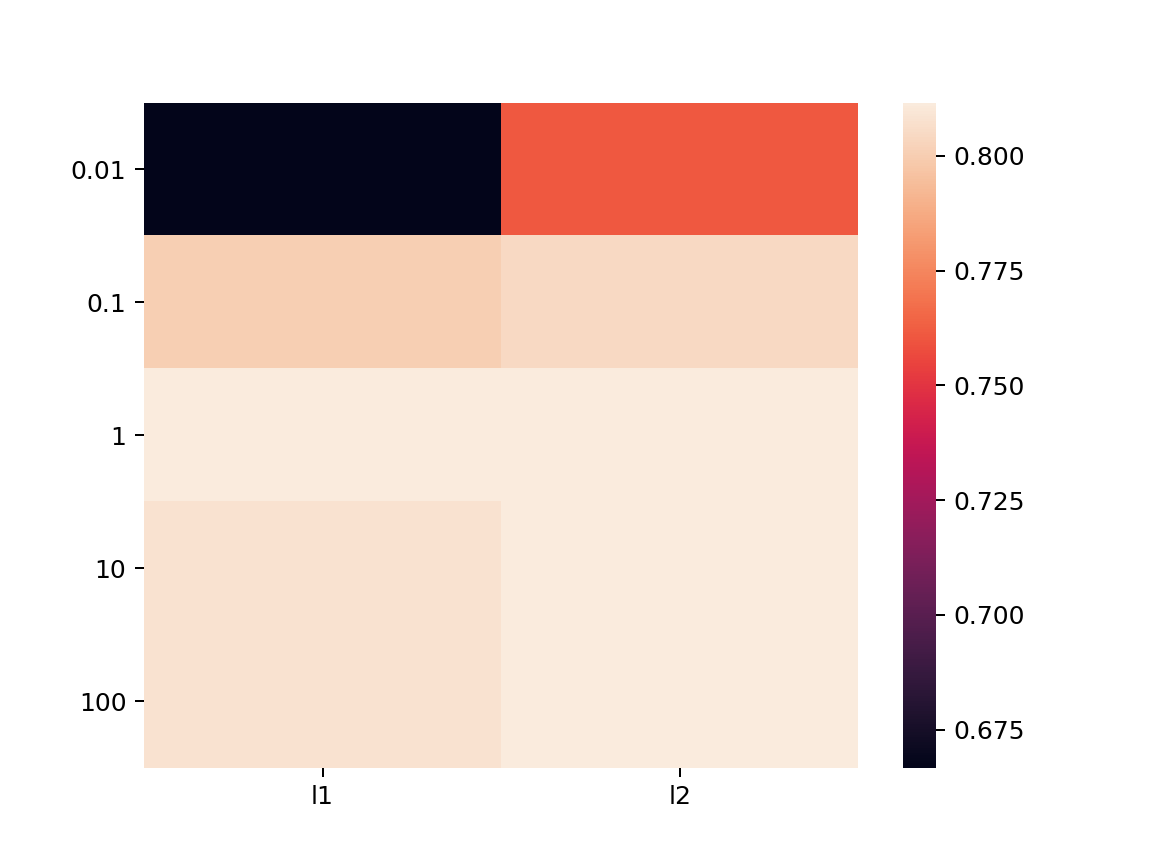

In [12]:
# Use the following function to help visualize results from the grid search
def GridSearch_Heatmap(scores):
    %matplotlib notebook
    import seaborn as sns
    import matplotlib.pyplot as plt
    plt.figure()
    sns.heatmap(scores.reshape(5,2), xticklabels=['l1','l2'], yticklabels=[0.01, 0.1, 1, 10, 100])
    plt.yticks(rotation=0);

GridSearch_Heatmap(answer_six())